This notebook serves as a demonstration on how neural networks can be integrated into the Monte Carlo Tree Search (MCTS) framework using self-play data. Monte Carlo Tree Search is a powerful algorithm commonly used in game-playing AI to evaluate multiple possible sequences of decisions and determine the optimal move.

# Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

The baseline accuracy is 1.2% since, on a 9 x 9 board, the chance of making the correct play is only 1 in 81.

# Load Data

In [3]:
# Set random seed to make script reproducible
np.random.seed(2023)

# Load sample data (40,000 moves - 5,000 MCTS rounds/move)
X = np.load('../generated_games/features-40k.npy')
y = np.load('../generated_games/labels-40k.npy')
samples = X.shape[0]
board_size = 9 * 9

# Preprocess data and TTS

In [4]:
# Transform the input into vectors of size 81, instead of 9 x 9 matrices
X = X.reshape(samples, board_size)
y = y.reshape(samples, board_size)

# 80% of data will be trained on
train_samples = int(0.8 * samples)

# TTS
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

# CNN Model

In [5]:
model = Sequential([
    Dense(1000, activation='sigmoid', input_shape=(board_size,)),
    Dense(500, activation='sigmoid'),
    Dense(board_size, activation='sigmoid')
])

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=15,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print(f'Test loss: \n{score[0]}')
print(f'Test accuracy: \n{score[1]}')

Epoch 1/15
518/518 [==============================] - 2s 4ms/step - loss: 0.1392 - accuracy: 0.0112 - val_loss: 0.0559 - val_accuracy: 0.0174
Epoch 2/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0387 - accuracy: 0.0183 - val_loss: 0.0287 - val_accuracy: 0.0201
Epoch 3/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.0187 - val_loss: 0.0214 - val_accuracy: 0.0220
Epoch 4/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.0194 - val_loss: 0.0183 - val_accuracy: 0.0233
Epoch 5/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.0192 - val_loss: 0.0167 - val_accuracy: 0.0220
Epoch 6/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.0192 - val_loss: 0.0156 - val_accuracy: 0.0227
Epoch 7/15
518/518 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.0198 - val_loss: 0.0150 - val_accuracy: 0.0233
Epoch 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              82000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 81)                40581     
                                                                 
Total params: 623081 (2.38 MB)
Trainable params: 623081 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


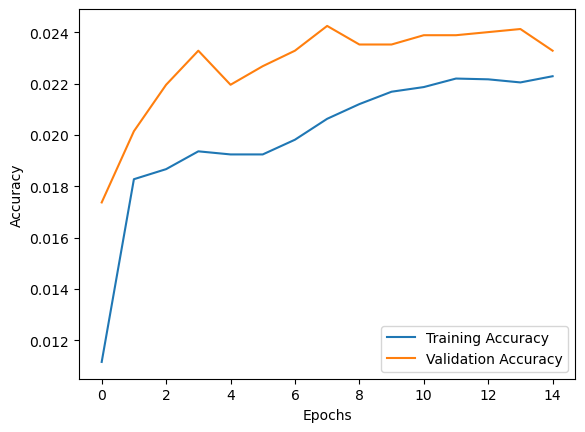

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Evaluate the model on a known board position

In [8]:
test_board = np.array([[
 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 1, -1, 1, -1, 0, 0, 0, 0,
 0, 1, -1, 1, -1, 0, 0, 0, 0,
 0, 0, 1, -1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0,
]])
move_probs = model.predict(test_board)[0]
i = 0
for row in range(9):
    row_formatted = []
    for col in range(9):
        row_formatted.append('{:.3f}'.format(move_probs[i]))
        i += 1
    print(' '.join(row_formatted))

1/1 [==============================] - 0s 66ms/step
0.039 0.040 0.041 0.041 0.041 0.040 0.040 0.040 0.038
0.040 0.041 0.043 0.045 0.047 0.044 0.043 0.040 0.040
0.042 0.045 0.040 0.047 0.046 0.046 0.040 0.043 0.038
0.040 0.044 0.048 0.048 0.044 0.044 0.044 0.046 0.041
0.041 0.045 0.049 0.045 0.048 0.046 0.047 0.045 0.043
0.042 0.045 0.046 0.048 0.048 0.045 0.048 0.044 0.040
0.040 0.041 0.040 0.047 0.048 0.045 0.041 0.042 0.040
0.041 0.041 0.043 0.046 0.045 0.044 0.044 0.042 0.040
0.037 0.040 0.042 0.041 0.041 0.041 0.041 0.037 0.039


# Load Data

In [9]:
# Set random seed to make script reproducible
np.random.seed(2023)

# Load sample data (40,000 moves - 5,000 MCTS rounds/move)
X = np.load('../generated_games/features-40k.npy')
y = np.load('../generated_games/labels-40k.npy')
samples = X.shape[0]
size = 9

# The input shape is 3D; use one plane of a 9 x 9 board representation
input_shape = (size, size, 1)

# Preprocess data and TTS

In [10]:
# Reshape data accordingly
X = X.reshape(samples, size, size, 1)

# 80% of data will be trained on
train_samples = int(0.8 * samples)

# TTS
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

# CNN Model

In [11]:
model2 = Sequential([
    # First layer in network is Conv2D layer with 48 output filters
    Conv2D(filters=48,
           # 3 x 3 convulational kernel layer
           kernel_size=(3,3),
           # Adding padding = 'same', Keras pads matrix
           # with 0s around the edges so output has same dimensions
           # as the input
           padding='same',
           activation='sigmoid',
           input_shape=input_shape),
    # Second layer is another convolution layer
    Conv2D(48, (3, 3),
           padding='same',
           activation='sigmoid'),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(size * size, activation='sigmoid')
])

model2.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train,
          batch_size=64,
          epochs=15,
          validation_data=(X_test, y_test))

score2 = model2.evaluate(X_test, y_test)
print(f'Test loss: \n{score2[0]}')
print(f'Test accuracy: \n{score2[1]}')

Epoch 1/15
518/518 [==============================] - 7s 14ms/step - loss: 0.0943 - accuracy: 0.0011 - val_loss: 0.0359 - val_accuracy: 0.0012
Epoch 2/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0268 - accuracy: 0.0144 - val_loss: 0.0214 - val_accuracy: 0.0249
Epoch 3/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0191 - accuracy: 0.0232 - val_loss: 0.0174 - val_accuracy: 0.0249
Epoch 4/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0165 - accuracy: 0.0255 - val_loss: 0.0157 - val_accuracy: 0.0251
Epoch 5/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0152 - accuracy: 0.0253 - val_loss: 0.0148 - val_accuracy: 0.0251
Epoch 6/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0145 - accuracy: 0.0253 - val_loss: 0.0142 - val_accuracy: 0.0251
Epoch 7/15
518/518 [==============================] - 7s 13ms/step - loss: 0.0140 - accuracy: 0.0253 - val_loss: 0.0138 - val_accuracy: 0.0251

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 48)          480       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 48)          20784     
                                                                 
 flatten (Flatten)           (None, 3888)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1991168   
                                                                 
 dense_4 (Dense)             (None, 81)                41553     
                                                                 
Total params: 2053985 (7.84 MB)
Trainable params: 2053985 (7.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


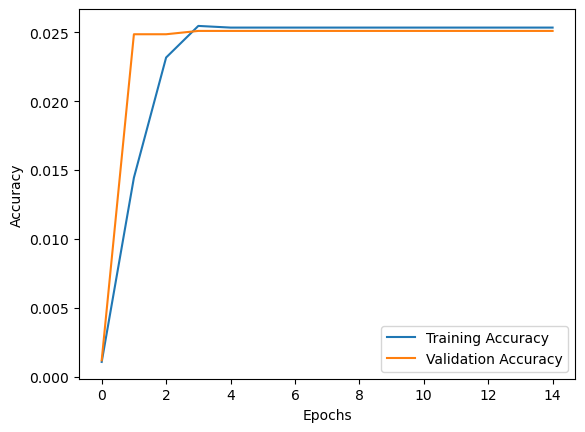

In [13]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Load Data

In [14]:
# Set random seed to make script reproducible
np.random.seed(2023)

# Load sample data (40,000 moves - 5,000 MCTS rounds/move)
X = np.load('../generated_games/features-40k.npy')
y = np.load('../generated_games/labels-40k.npy')
samples = X.shape[0]
size = 9

# The input shape is 3D; use one plane of a 9 x 9 board representation
input_shape = (size, size, 1)

# Preprocess Data and TTS

In [15]:
# Reshape data accordingly
X = X.reshape(samples, size, size, 1)

# 80% of data will be trained on
train_samples = int(0.8 * samples)

# TTS
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

# CNN Model

In [16]:
model3 = Sequential([
    Conv2D(48, kernel_size=(3,3),
           activation='relu',
           padding='same',
           input_shape=input_shape),
    Dropout(rate=0.5),
    Conv2D(48, (3,3),
           padding='same',
           activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(size * size, activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history3 = model3.fit(X_train, y_train,
           batch_size=64,
           epochs=100,
           validation_data=(X_test, y_test))

score3 = model3.evaluate(X_test, y_test)
print(f'Test loss: \n{score3[0]}')
print(f'Test accuracy: \n{score3[1]}')

Epoch 1/100
518/518 [==============================] - 6s 11ms/step - loss: 4.3707 - accuracy: 0.0198 - val_loss: 4.3238 - val_accuracy: 0.0249
Epoch 2/100
518/518 [==============================] - 6s 11ms/step - loss: 4.3176 - accuracy: 0.0247 - val_loss: 4.2785 - val_accuracy: 0.0259
Epoch 3/100
518/518 [==============================] - 6s 11ms/step - loss: 4.2912 - accuracy: 0.0240 - val_loss: 4.2594 - val_accuracy: 0.0241
Epoch 4/100
518/518 [==============================] - 6s 11ms/step - loss: 4.2750 - accuracy: 0.0248 - val_loss: 4.2446 - val_accuracy: 0.0259
Epoch 5/100
518/518 [==============================] - 6s 11ms/step - loss: 4.2578 - accuracy: 0.0241 - val_loss: 4.2308 - val_accuracy: 0.0255
Epoch 6/100
518/518 [==============================] - 6s 11ms/step - loss: 4.2380 - accuracy: 0.0245 - val_loss: 4.2133 - val_accuracy: 0.0259
Epoch 7/100
518/518 [==============================] - 6s 11ms/step - loss: 4.2148 - accuracy: 0.0252 - val_loss: 4.1841 - val_accuracy:

In [17]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 9, 48)          480       
                                                                 
 dropout (Dropout)           (None, 9, 9, 48)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 48)          20784     
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 48)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                      

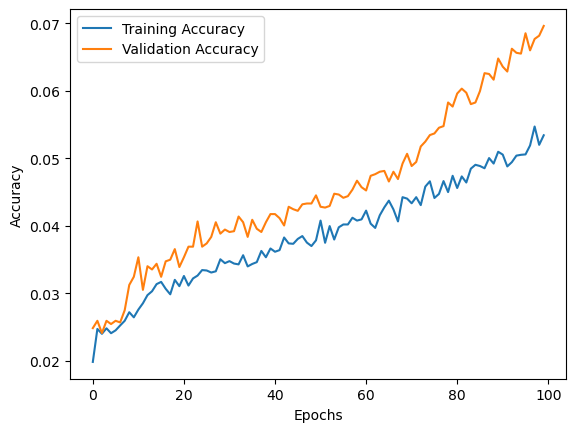

In [18]:
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Load Data

In [19]:
# Set random seed to make script reproducible
np.random.seed(2023)

# Load sample data (500 games - 1,000 MCTS rounds/move)
X = np.load('../generated_games/features-500.npy')
y = np.load('../generated_games/labels-500.npy')
samples = X.shape[0]
board_size = 9 * 9

# Preprocess data and TTS

In [20]:
# Reshape data accordingly
X = X.reshape(samples, size, size, 1)

# 80% of data will be trained on
train_samples = int(0.8 * samples)

# TTS
X_train, X_test = X[:train_samples], X[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

# CNN Model

In [21]:
model4 = Sequential([
    Conv2D(48, kernel_size=(3,3),
           activation='relu',
           padding='same',
           input_shape=input_shape),
    Dropout(rate=0.5),
    Conv2D(48, (3,3),
           padding='same',
           activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(size * size, activation='softmax')
])

model4.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history4 = model4.fit(X_train, y_train,
           batch_size=64,
           epochs=100,
           validation_data=(X_test, y_test))

score4 = model4.evaluate(X_test, y_test)
print(f'Test loss: \n{score4[0]}')
print(f'Test accuracy: \n{score4[1]}')

Epoch 1/100
363/363 [==============================] - 5s 11ms/step - loss: 4.4088 - accuracy: 0.0132 - val_loss: 4.3892 - val_accuracy: 0.0153
Epoch 2/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3952 - accuracy: 0.0150 - val_loss: 4.3863 - val_accuracy: 0.0171
Epoch 3/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3895 - accuracy: 0.0153 - val_loss: 4.3839 - val_accuracy: 0.0164
Epoch 4/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3857 - accuracy: 0.0157 - val_loss: 4.3810 - val_accuracy: 0.0150
Epoch 5/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3823 - accuracy: 0.0164 - val_loss: 4.3786 - val_accuracy: 0.0152
Epoch 6/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3796 - accuracy: 0.0165 - val_loss: 4.3760 - val_accuracy: 0.0169
Epoch 7/100
363/363 [==============================] - 4s 11ms/step - loss: 4.3777 - accuracy: 0.0172 - val_loss: 4.3737 - val_accuracy:

In [22]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 9, 48)          480       
                                                                 
 dropout_3 (Dropout)         (None, 9, 9, 48)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 48)          20784     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 48)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 48)          0         
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                      

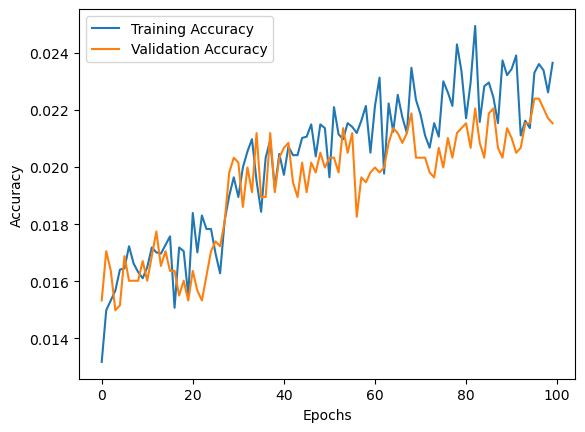

In [23]:
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('mcts_plot.png');